# DV Assignment 2

## Quiver Plot

### Team: Rainbow Colourmap Haters

*Sai Madhavan G. - IMT2021101*

### Data selection

We picked 10 days between December 2011 - January 2012 uniformly from the [OSCAT wind dataset](https://las.incois.gov.in/). We picked this date so that we can visualize the cyclone [Thane](https://en.wikipedia.org/wiki/Cyclone_Thane) in the Bay of Bengal which hit South India between December 25 and December 31, 2011.

### Initialization

Importing necessary libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [18]:
zonal = np.loadtxt('./data/zonal/02-01-2012.tsv', delimiter="\t", dtype=str)
meridonial = np.loadtxt('./data/meridonial/02-01-2012.tsv', delimiter="\t", dtype=str)

zonal.shape, meridonial.shape

((361, 722), (361, 722))

Converting into float

In [19]:
long, lat = np.arange(0., 360.5, 0.5), np.arange(-89.75, 90, 0.5)
u = zonal[1:, 1:].astype('float')
v = meridonial[1:, 1:].astype('float')

u.shape, v.shape

((360, 721), (360, 721))

Checking for nan values

In [20]:
np.count_nonzero(np.isnan(u)), np.count_nonzero(np.isnan(v))

(0, 0)

Replacing bad flags with nans

In [21]:
u[u==-1.e+34] = np.nan
v[v==-1.e+34] = np.nan

np.count_nonzero(np.isnan(u)), np.count_nonzero(np.isnan(v))

(93661, 93659)

Creating a meshgrid

In [22]:
lons, lats = np.meshgrid(long,lat)

Creating a basemap projection on the bay of bengal

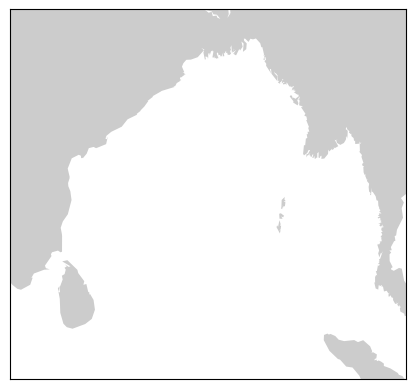

In [23]:
m = Basemap(llcrnrlon=77.,llcrnrlat=3,urcrnrlon=101.,urcrnrlat=24.,\
            resolution='l',area_thresh=1000.,projection='poly',\
            lat_0=10.5,lon_0=89.)
m.fillcontinents(color='0.8')

Transforming the meshgrid to coordinates of the projection

In [24]:
x, y = m(lons, lats)

Shifting the grid coordinates

In [25]:
ugrid,newlons = shiftgrid(180.,u,long,start=False)
vgrid,newlons = shiftgrid(180.,v,long,start=False)

Creating a new meshgrid

In [37]:
uproj,vproj,xx,yy = \
m.transform_vector(ugrid,vgrid,newlons,lat,21,21,returnxy=True,masked=True)

Creating a quiver plot

Text(0.5, 1.0, '02-12-2012')

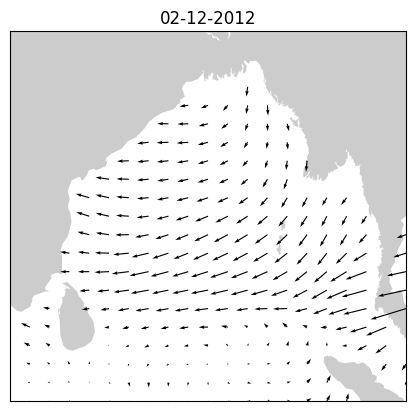

In [38]:
m.fillcontinents()
Q = m.quiver(xx,yy,uproj,vproj)
plt.title("02-12-2012")

Calculating the velocities and normalizing

In [28]:
vels = np.hypot(uproj, vproj)
u_scaled = uproj/vels
v_scaled = vproj/vels

Creating another quiver plot with same length vectors and mapped to a colormap

Text(0.5, 1.0, '02-12-2012')

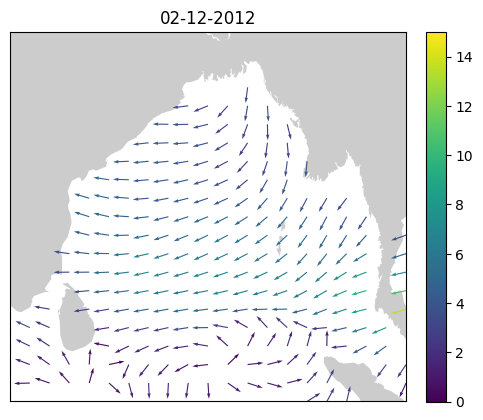

In [41]:
m.fillcontinents(color='0.8')
Q_c = m.quiver(xx,yy,u_scaled,v_scaled,vels, scale=25, cmap='viridis')
cbar = m.colorbar(Q_c,location='right',pad="5%")
plt.clim(0, 15)
plt.title("02-12-2012")

Wrapping everything done above in a function

In [30]:
def plot_quiver(filename):
    zonal = np.loadtxt(f'./data/zonal/{filename}.tsv', delimiter="\t", dtype=str)
    meridonial = np.loadtxt(f'./data/meridonial/{filename}.tsv', delimiter="\t", dtype=str)

    if (zonal.shape, meridonial.shape) != ((361, 722), (361, 722)):
        print(f"Shape mismatch for {filename}")

    long, lat = np.arange(0., 360.5, 0.5), np.arange(-89.75, 90, 0.5)
    u = zonal[1:, 1:].astype('float')
    v = meridonial[1:, 1:].astype('float')

    if (np.count_nonzero(np.isnan(u)), np.count_nonzero(np.isnan(v))) != (0, 0):
        print(f"Nan values detected for {filename}")

    u[u==-1.e+34] = np.nan
    v[v==-1.e+34] = np.nan

    lons, lats = np.meshgrid(long,lat)
    m = Basemap(llcrnrlon=77.,llcrnrlat=3,urcrnrlon=101.,urcrnrlat=24.,\
            resolution='l',area_thresh=1000.,projection='poly',\
            lat_0=10.5,lon_0=89.)
    m.fillcontinents(color='0.8')
    x, y = m(lons, lats)
    ugrid,newlons = shiftgrid(180.,u,long,start=False)
    vgrid,newlons = shiftgrid(180.,v,long,start=False)
    uproj,vproj,xx,yy = \
    m.transform_vector(ugrid,vgrid,newlons,lat,21,21,returnxy=True,masked=True)
    m.fillcontinents()
    Q = m.quiver(xx,yy,uproj,vproj)
    plt.title(filename)
    plt.savefig(f"./plots/quiver/{filename}.jpg")
    plt.show()

    vels = np.hypot(uproj, vproj)
    u_scaled = uproj/vels
    v_scaled = vproj/vels
    m.fillcontinents(color='0.8')
    Q_c = m.quiver(xx,yy,u_scaled,v_scaled,vels, scale=25, cmap='viridis')
    cbar = m.colorbar(Q_c,location='right',pad="5%")
    plt.clim(0, 15)
    plt.title(filename)
    plt.savefig(f"./plots/quiver_c/{filename}.jpg")
    plt.show()

Plotting for the selected dates

In [31]:
dates = [
    "12-12-2011",
    "15-12-2011",
    "18-12-2011",
    "21-12-2011",
    "24-12-2011",
    "27-12-2011",
    "30-12-2011",
    "02-01-2012",
    "05-01-2012",
    "08-01-2012",
]

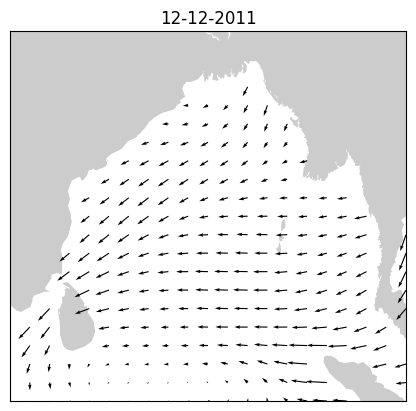

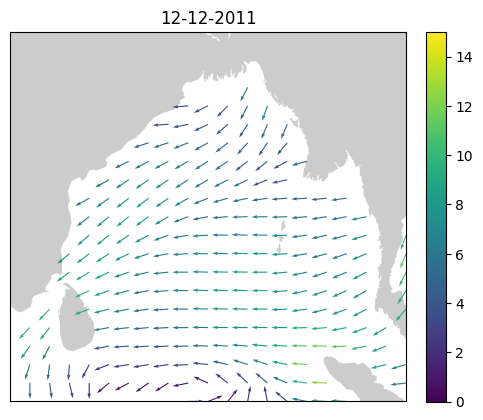

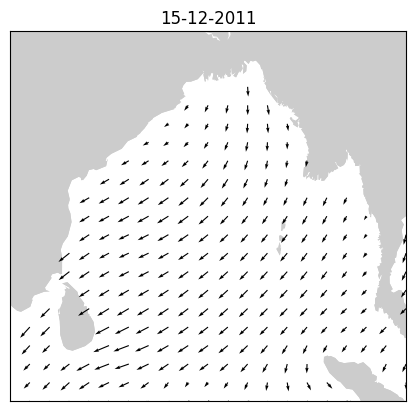

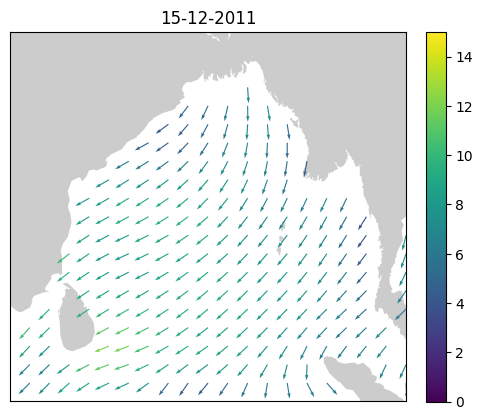

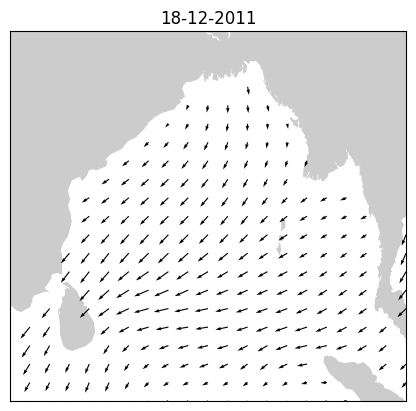

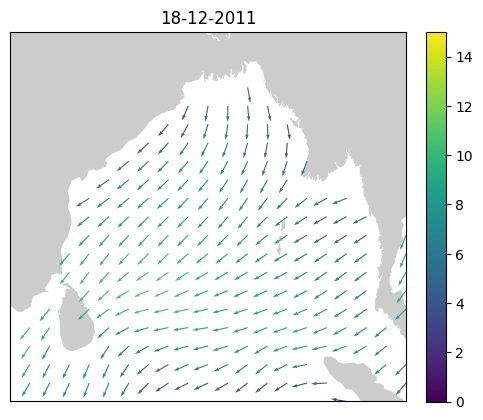

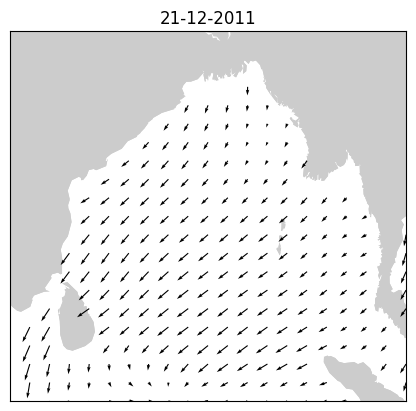

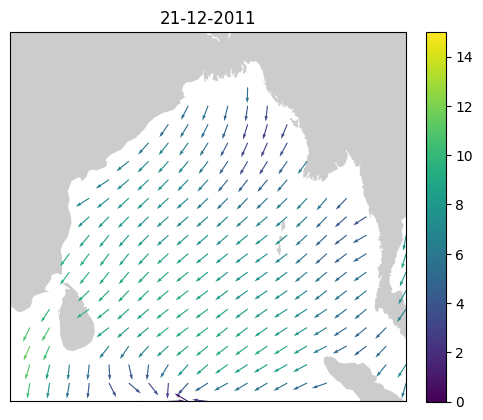

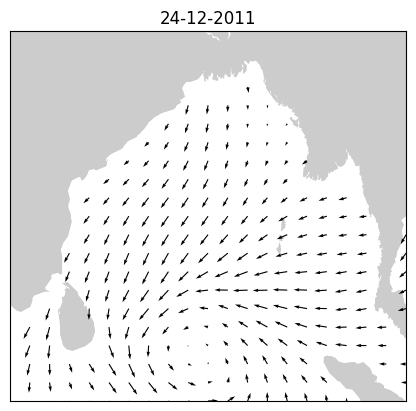

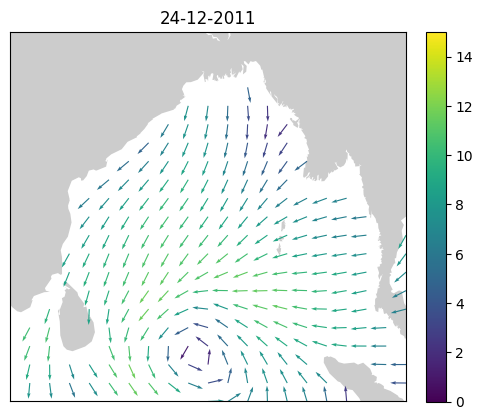

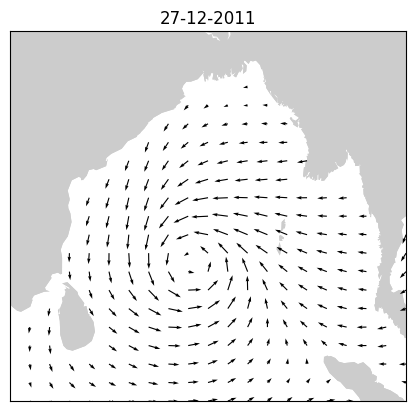

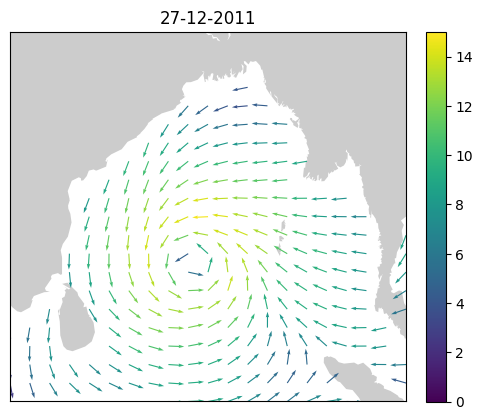

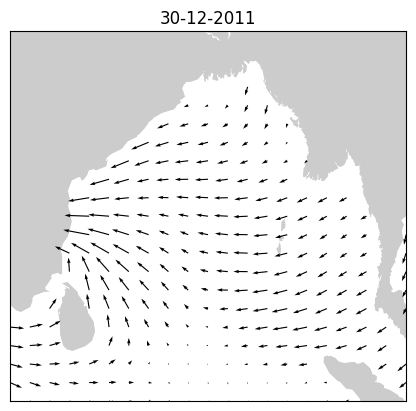

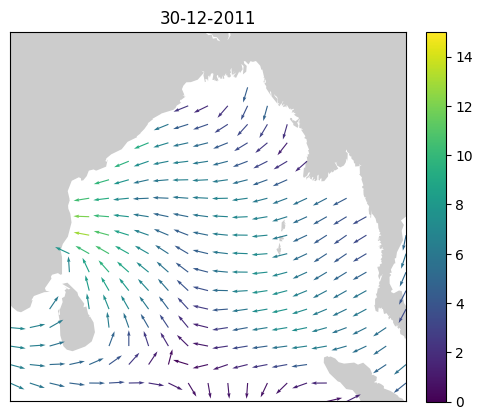

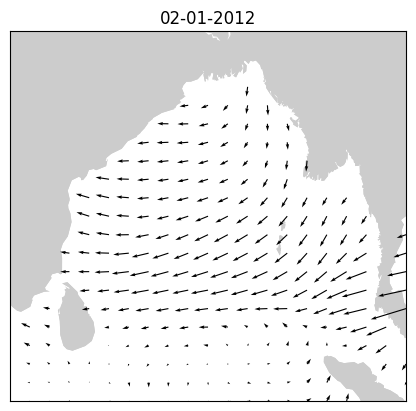

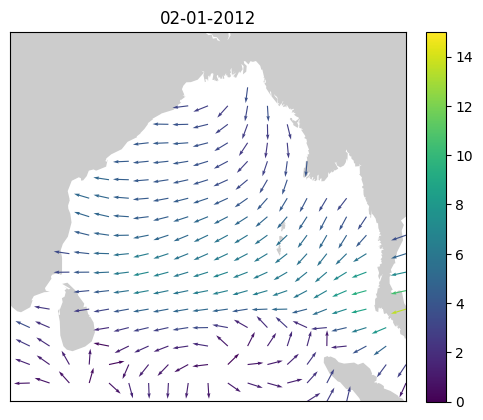

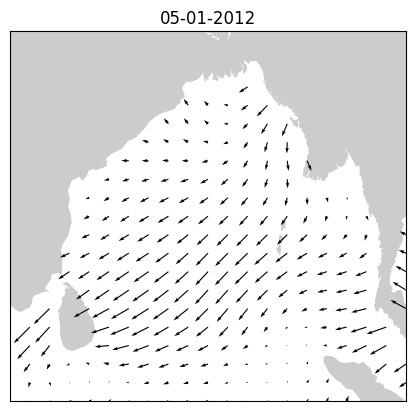

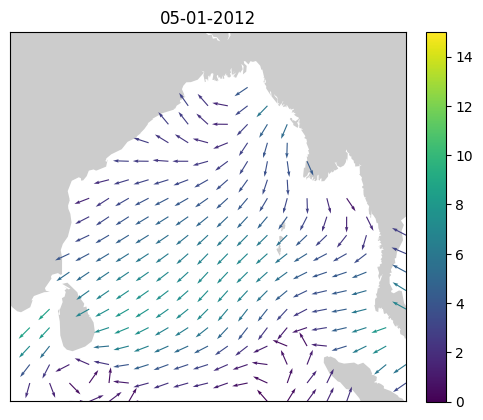

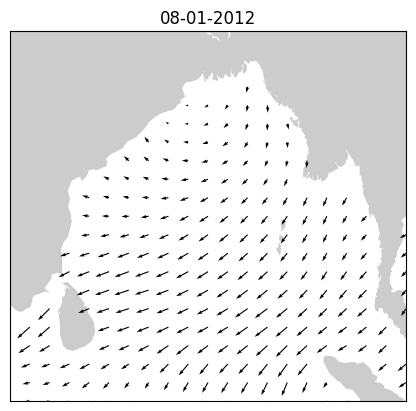

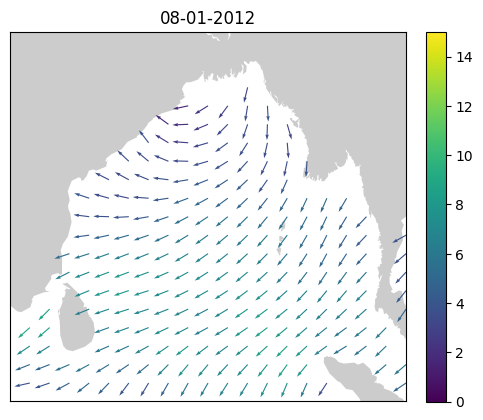

In [32]:
for date in dates:
    plot_quiver(date)